Cluster Centers (scaled values):
[[ 1.02799959  1.12797813]
 [-1.30498732 -1.25489349]
 [ 0.3058728   0.16541778]]


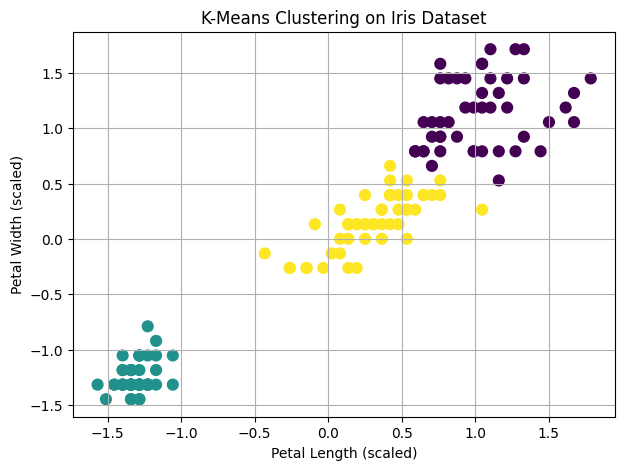

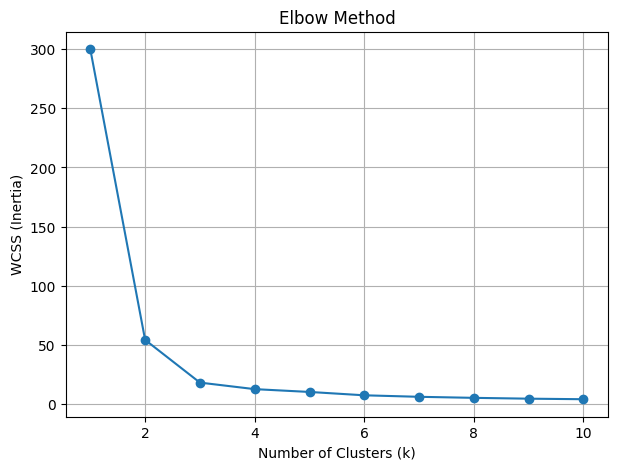

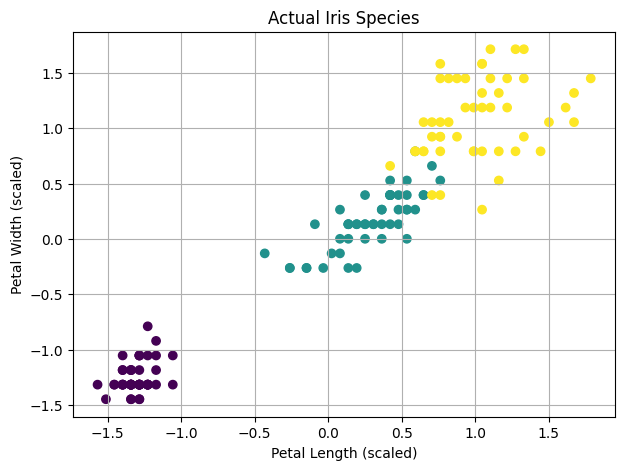

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df[["petal length (cm)", "petal width (cm)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df["cluster"] = labels

print("Cluster Centers (scaled values):")
print(kmeans.cluster_centers_)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, s=60, cmap="viridis")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.grid(True)
plt.show()

wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

actual = iris.target

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=actual, cmap="viridis")
plt.title("Actual Iris Species")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.grid(True)
plt.show()
